In [ ]:
#   Data Understanding  #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
import pandas as pd

file_path = 'Train_v1.txt'
column_names = ['toRemove', 'is_sarcastic', 'text']

#read the dataset
data = pd.read_csv(file_path, sep='\t', header=None, names=column_names)
print(data)

       toRemove  is_sarcastic  \
0      TrainSen             0   
1      TrainSen             0   
2      TrainSen             0   
3      TrainSen             0   
4      TrainSen             0   
...         ...           ...   
39775  TrainSen             1   
39776  TrainSen             1   
39777  TrainSen             1   
39778  TrainSen             1   
39779  TrainSen             1   

                                                    text  
0      @0430yes i hope youre lurking rn. i want to li...  
1      05 really taught me a valuable lesson I'm neve...  
2      @098BERRY Never had a voice to protest, so you...  
3      @0hMySt4rs Rest in peace & love to you and you...  
4      100 days until Christmas! 🌲 #too soon #not rea...  
...                                                  ...  
39775  @Zendaya I could see the makeup artists giving...  
39776  @ZiggiWatkins11 Slvr... That's great name #NOT...  
39777  @zoso4986 @Nero He is the fag we need but not ...  
39778  Zuma s

In [13]:
data.head(10)

toRemove  is_sarcastic                                               text
0  TrainSen             0  @0430yes i hope youre lurking rn. i want to li...
1  TrainSen             0  05 really taught me a valuable lesson I'm neve...
2  TrainSen             0  @098BERRY Never had a voice to protest, so you...
3  TrainSen             0  @0hMySt4rs Rest in peace & love to you and you...
4  TrainSen             0  100 days until Christmas! 🌲 #too soon #not rea...
5  TrainSen             0  @100_ThingsILove @WhatNinaSpotted yay! Can't w...
6  TrainSen             0  100 words short of the word requirement but I ...
7  TrainSen             0  @1010xlhacker it was nice hanging out this aft...
8  TrainSen             0      10k walk this morning. We did an awesome job.
9  TrainSen             0               10 minutes to eat #challengeaccepted

In [14]:
data.tail(10)

toRemove  is_sarcastic  \
39770  TrainSen             1   
39771  TrainSen             1   
39772  TrainSen             1   
39773  TrainSen             1   
39774  TrainSen             1   
39775  TrainSen             1   
39776  TrainSen             1   
39777  TrainSen             1   
39778  TrainSen             1   
39779  TrainSen             1   

                                                    text  
39770  Yup, I'm a jumper if i want it im goin for it....  
39771  @yusef_ram tpab has no reply value at all. His...  
39772  @zackalltimelow sometimes I wish you would bab...  
39773  @ZaidZamanHamid #Not at all, if somebody says ...  
39774  @zaynmalik go and translate the tweet I tweete...  
39775  @Zendaya I could see the makeup artists giving...  
39776  @ZiggiWatkins11 Slvr... That's great name #NOT...  
39777  @zoso4986 @Nero He is the fag we need but not ...  
39778  Zuma sounding like Kanye West right now trying...  
39779  @ZZUCRU @UWDawgPack So true. Students - stick ...

In [3]:
#display number of rows in dataset
total_rows = len(data)
print(total_rows)

39780


In [4]:
# check number of rows for each class
sarcastic_counts = data["is_sarcastic"].value_counts()

print("Number of rows for each value in the 'isSarcastic' column:")
print(sarcastic_counts)

Number of rows for each value in the 'isSarcastic' column:
is_sarcastic
0    21292
1    18488
Name: count, dtype: int64


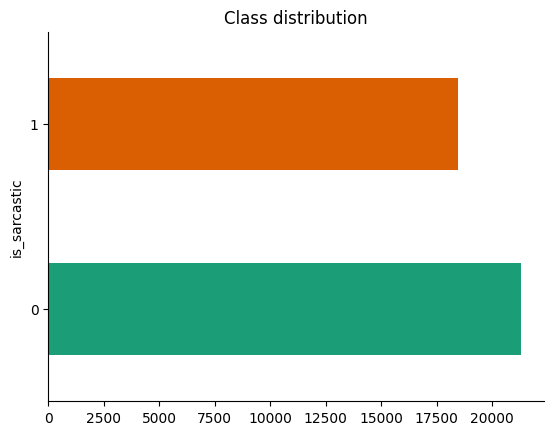

In [22]:
# Group by class and plot the bar chart
data.groupby("is_sarcastic").size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Class distribution')
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39780 entries, 0 to 39779
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   toRemove      39780 non-null  object
 1   is_sarcastic  39780 non-null  int64 
 2   text          39780 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.5+ KB


In [23]:
# Calculate the number of words in each sentence
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Display statistics for the number of words
print(data['word_count'].describe())


count    39780.000000
mean        16.805153
std          6.490967
min          1.000000
25%         12.000000
50%         17.000000
75%         22.000000
max         52.000000
Name: word_count, dtype: float64


In [25]:
import re
data['sentence_count'] = data['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

print(data['sentence_count'].describe())


count    39780.000000
mean         0.892509
std          0.980828
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         16.000000
Name: sentence_count, dtype: float64


In [26]:
# Check for duplicate sentences in the 'text' column
duplicate_sentences = data['text'].duplicated()

# Count the number of duplicate sentences
num_duplicate_sentences = duplicate_sentences.sum()

print("Number of duplicate sentences:", num_duplicate_sentences)


Number of duplicate sentences: 0


In [28]:
%pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     -------------------------------------- 42.0/42.0 kB 503.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   --------------------- ------------------ 143.4/269.5 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 269.5/269.5 kB 4.2 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install wordCloud


   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.0 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.0 kB 435.7 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 1000x600 with 0 Axes>

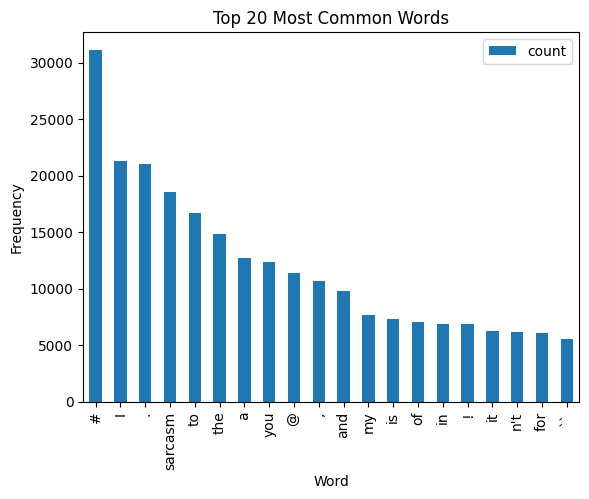

In [31]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK
nltk.download('punkt')

# Tokenize the text data into individual words/tokens
data['tokens'] = data['text'].apply(word_tokenize)

word_counts = Counter(word for tokens in data['tokens'] for word in tokens)

import matplotlib.pyplot as plt
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])

word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

# Plot the top 20 most common words
plt.figure(figsize=(10, 6))
word_counts_df.head(20).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words')
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


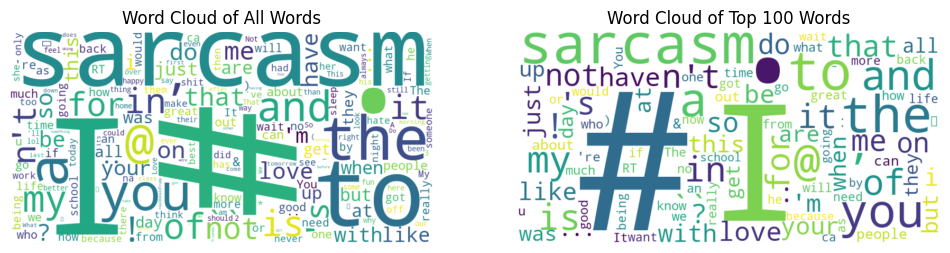

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize the text data into individual words
text = ' '.join(data['text'])  
tokens = word_tokenize(text)

word_freq = Counter(tokens)

# Create a word cloud of all words
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Create a word cloud of the most popular words top 100
wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq.most_common(100)))

# display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of All Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.title('Word Cloud of Top 100 Words')
plt.axis('off')

plt.show()


In [45]:
import pandas as pd
import re

file_path = 'Train_v1.txt'
column_names = ['toRemove', 'is_sarcastic', 'text']

# Read the dataset
data = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

# Define patterns to remove
patterns = [
    r'#sarcasm\b',
    r'#not\b',
    r'#Not\b',
    r'#sarcastic\b',
    r'#sarcastictweet\b'
]

# Remove patterns from text
for pattern in patterns:
    data['text'] = data['text'].apply(lambda x: re.sub(pattern, '', x))

# Drop the 'toRemove' column
data.drop(columns=['toRemove'], inplace=True)

# Create a new CSV file without the removed patterns and 'toRemove' column
output_file_path = 'Train_v1_cleaned_without_column.csv'
data.to_csv(output_file_path, index=False)

print("Data without specified patterns and 'toRemove' column saved to:", output_file_path)


Data without specified patterns and 'toRemove' column saved to: Train_v1_cleaned_without_column.csv


In [95]:
data.head(10)

is_sarcastic                                               text
0             0  @0430yes i hope youre lurking rn. i want to li...
1             0  05 really taught me a valuable lesson I'm neve...
2             0  @098BERRY Never had a voice to protest, so you...
3             0  @0hMySt4rs Rest in peace & love to you and you...
4             0   100 days until Christmas! 🌲 #too soon  ready yet
5             0  @100_ThingsILove @WhatNinaSpotted yay! Can't w...
6             0  100 words short of the word requirement but I ...
7             0  @1010xlhacker it was nice hanging out this aft...
8             0      10k walk this morning. We did an awesome job.
9             0               10 minutes to eat #challengeaccepted

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


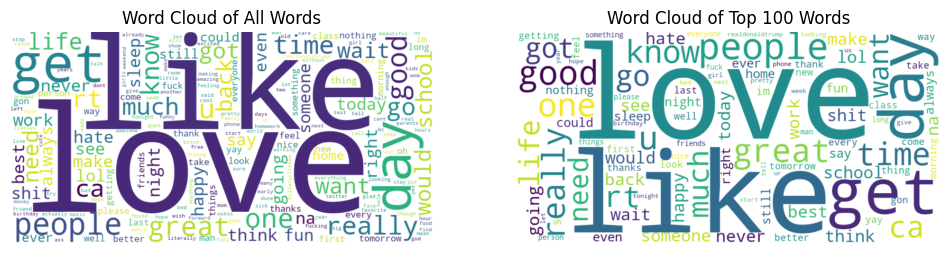

In [48]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

file_path = 'Train_v1_cleaned_without_column.csv'

# Read the dataset
newData = pd.read_csv(file_path)

# Tokenize the text data into individual words
text = ' '.join(newData['text'])  # Assuming df is your DataFrame containing the text data
tokens = word_tokenize(text)

# Optionally, filter out stopwords and perform other preprocessing steps
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Calculate the frequency of each word
word_freq = Counter(tokens)

# Create a word cloud of all words
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Create a word cloud of the most popular words (e.g., top 100)
wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq.most_common(100)))

# Display the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud of All Words')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.title('Word Cloud of Top 100 Words')
plt.axis('off')

plt.show()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


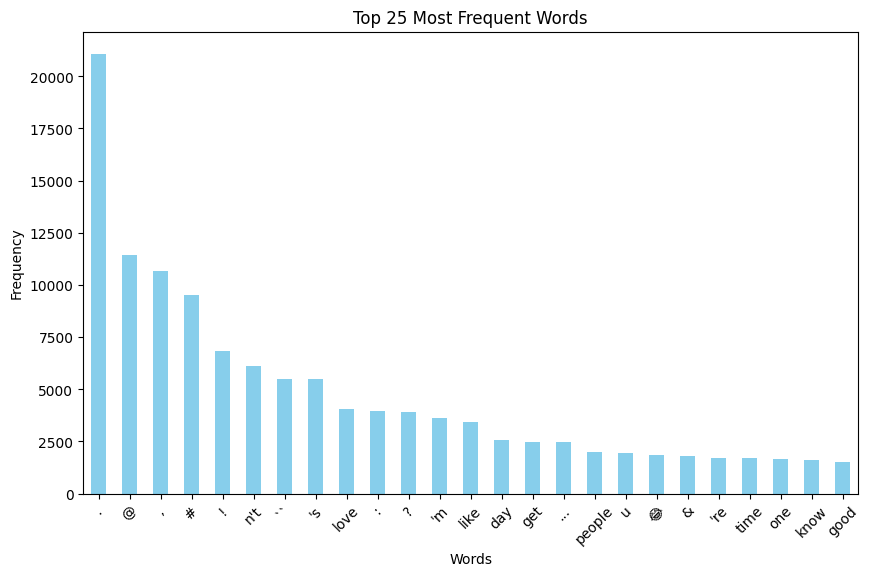

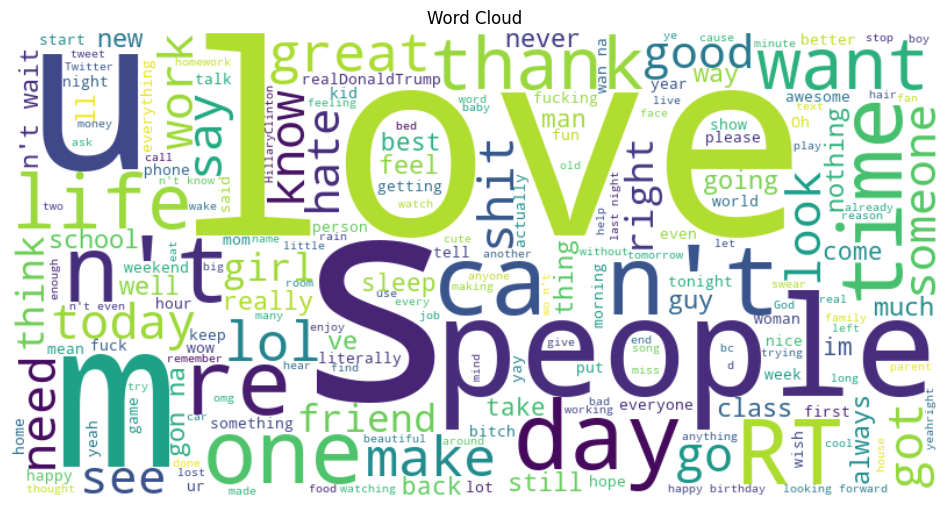

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Read the dataset
file_path = 'Train_v1_cleaned_without_column.csv'
# Read the dataset
newData = pd.read_csv(file_path)

# Tokenization
newData['tokens'] = newData['text'].apply(word_tokenize)

# Removal of Stop Words
stop_words = set(stopwords.words('english'))
newData['tokens'] = newData['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
newData['tokens'] = newData['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Flatten the list of tokens
all_tokens = [token for sublist in newData['tokens'] for token in sublist]

# Frequency Analysis
word_freq = pd.Series(all_tokens).value_counts().head(25)
plt.figure(figsize=(10, 6))
word_freq.plot(kind='bar', color='skyblue')
plt.title('Top 25 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


(-0.5, 599.5, 599.5, -0.5)

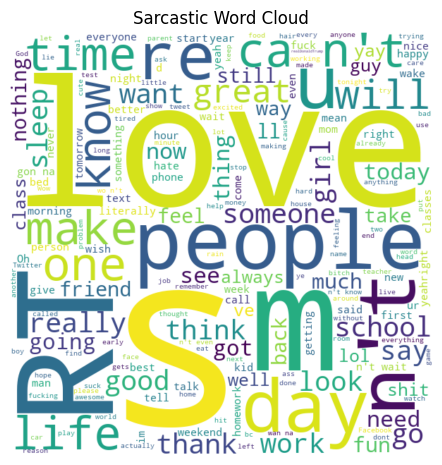

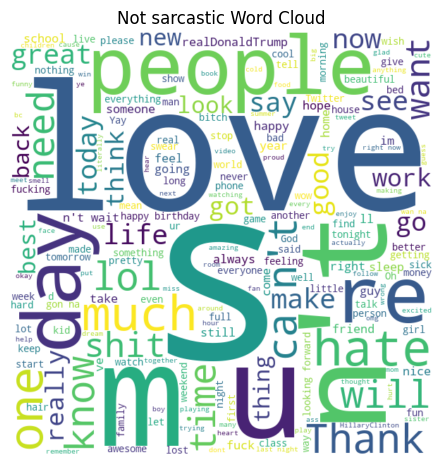

In [64]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Read the dataset
file_path = 'Train_v1_cleaned_without_column.csv'
data = pd.read_csv(file_path)

# Split the dataset based on class (sarcastic or non-sarcastic)
sarcastic_data = data[data['is_sarcastic'] == 1]
non_sarcastic_data = data[data['is_sarcastic'] == 0]

# Tokenize the text data in each subset
sarcastic_tokens = [word_tokenize(text) for text in sarcastic_data['text']]
non_sarcastic_tokens = [word_tokenize(text) for text in non_sarcastic_data['text']]

# Flatten the list of tokens
sarcastic_all_tokens = [token for sublist in sarcastic_tokens for token in sublist]
non_sarcastic_all_tokens = [token for sublist in non_sarcastic_tokens for token in sublist]

# Generate word clouds for each class
sarcastic_wordcloud = WordCloud(width=600, height=600, background_color='white').generate(' '.join(sarcastic_all_tokens))
non_sarcastic_wordcloud = WordCloud(width=600, height=600, background_color='white').generate(' '.join(non_sarcastic_all_tokens))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sarcastic_wordcloud, interpolation='bilinear')
plt.title('Sarcastic Word Cloud')
plt.axis('off')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(non_sarcastic_wordcloud, interpolation='bilinear')
plt.title('Not sarcastic Word Cloud')
plt.axis('off')

#plt.subplot


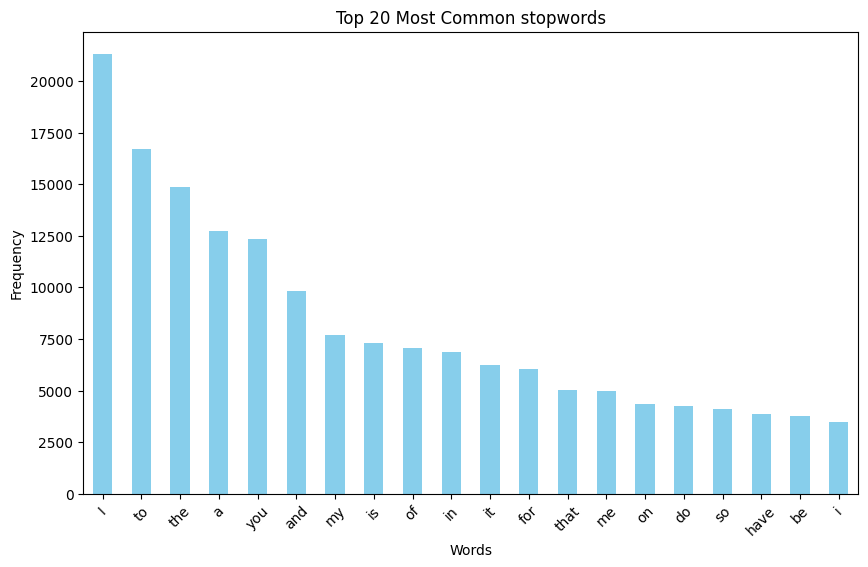

In [71]:
#look at stop words
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Read the dataset
file_path = 'Train_v1_cleaned_without_column.csv'
newData = pd.read_csv(file_path)

# Tokenization
newData['tokens'] = newData['text'].apply(word_tokenize)

# Removal of Stop Words
stop_words = set(stopwords.words('english'))
newData['tokens'] = newData['tokens'].apply(lambda x: [word for word in x if word.lower() in stop_words])

all_tokens = [token for sublist in newData['tokens'] for token in sublist]

word_freq = pd.Series(all_tokens).value_counts()

plt.figure(figsize=(10, 6))
word_freq.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()




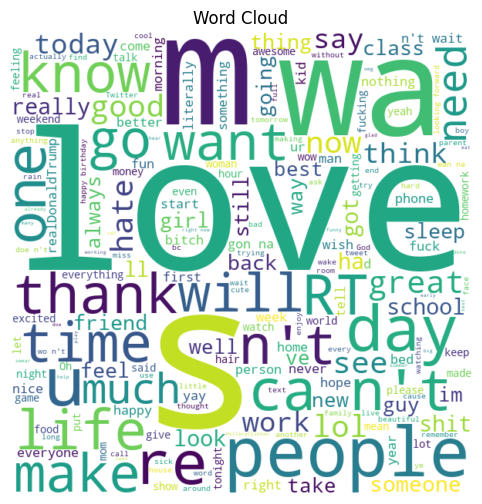

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Read the dataset
file_path = 'Train_v1_cleaned_without_column.csv'
newData = pd.read_csv(file_path)

# Join all the text from the dataset into a single string
text = ' '.join(newData['text'])

# Tokenize the text into individual words
tokens = word_tokenize(text)

# Lemmatize the tokens to their base form
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

# Generate word cloud
newWordCloud = WordCloud(width=600, height=600, background_color='white').generate(' '.join(lemmatized_tokens))

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(newWordCloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


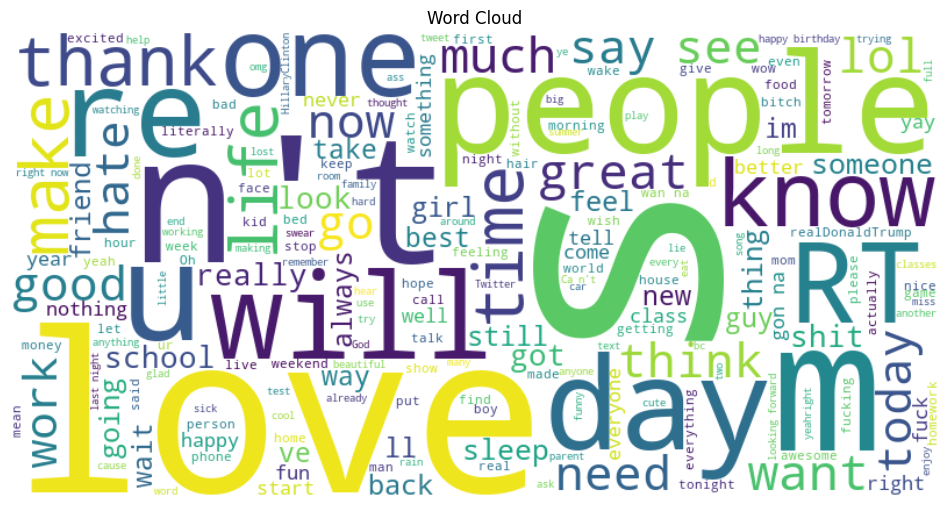

In [75]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the dataset
file_path = 'Train_v1_cleaned_without_column.csv'
newData = pd.read_csv(file_path)

# Define a mapping of abbreviated words to their expanded forms
abbreviation_mapping = {
    "can't": "cannot",
    "won't": "will not",
    "n't": " not",
    "n ' t": " not"
}

# Replace abbreviated words with their expanded forms
def replace_abbreviations(text):
    for abbr, expanded in abbreviation_mapping.items():
        text = re.sub(r'\b' + re.escape(abbr) + r'\b', expanded, text)
    return text

newData['text'] = newData['text'].apply(replace_abbreviations)

# Tokenize the text into individual words
text = ' '.join(newData['text'])
tokens = word_tokenize(text)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


['@0430yes i hope youre lurking rn.', 'i want to listen to hallucination & wanna love you again live someday, pretty please?!', "😭 😭 😭 05 really taught me a valuable lesson I'm never gonna be late again!", '@098BERRY Never had a voice to protest, so you fed me shit to digest.', 'I wish I had a reason, my flaws are open season.', '@0hMySt4rs Rest in peace & love to you and your family 100 days until Christmas!', '🌲 #too soon  ready yet @100_ThingsILove @WhatNinaSpotted yay!', "Can't wait to be reunited with you huni!", "Xx 100 words short of the word requirement but I don't care, I'm going to bed.", '#rebel #ihatehistory @1010xlhacker it was nice hanging out this afternoon.', 'I had a great time!', '10k walk this morning.', 'We did an awesome job.', "10 minutes to eat #challengeaccepted 10 Times One Direction Had the Perfect Love Song for Every Relationship : #10TurnOns Yet again if you list them on twitter you're garbage.", '@11aawwgg021 wow!', "sweet butt for all of them i love :) 11 

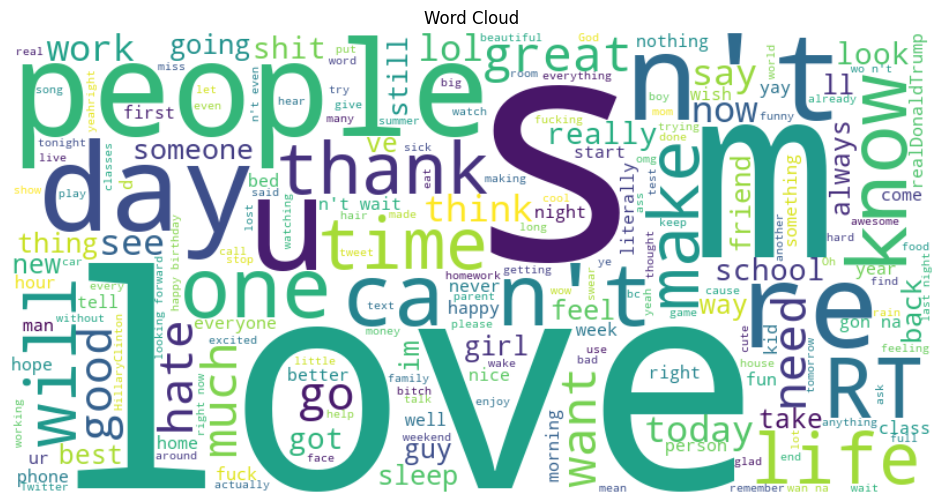

In [80]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_path = 'Train_v1_cleaned_without_column.csv'
newData = pd.read_csv(file_path)

text = ' '.join(newData['text'])

sentences = sent_tokenize(text)

# Tokenize each sentence into words
tokens = [word_tokenize(sentence) for sentence in sentences]
print(sentences)

all_tokens = [token for sublist in tokens for token in sublist]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

# Plot word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [98]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import text_mining_utils as tmu  # Import your own text analysis module


file_path = 'Train_v1_cleaned_without_column.csv'

# Load your dataset
data = pd.read_csv(file_path)  # Replace "your_dataset.csv" with the path to your dataset

# Assuming your dataset has columns named 'is_sarcastic' and 'text'
# You can rename the columns if needed
data.columns = ['is_sarcastic', 'text']

# Assuming you have text data and labels in your dataset
X = data['text']  # Extract text data
y = data['is_sarcastic']  # Extract labels

# Perform text preprocessing and feature extraction
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
matrix = vectorizer.fit_transform(X)

# Perform k-means clustering
num_clusters = 3  # Set the number of clusters
model_r, cluster_labels_r, cluster_centers_r = tmu.k_means_clustering(matrix, num_clusters, 'random')

# Print the original labels and the cluster labels
print(list(y))
print(cluster_labels_r)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

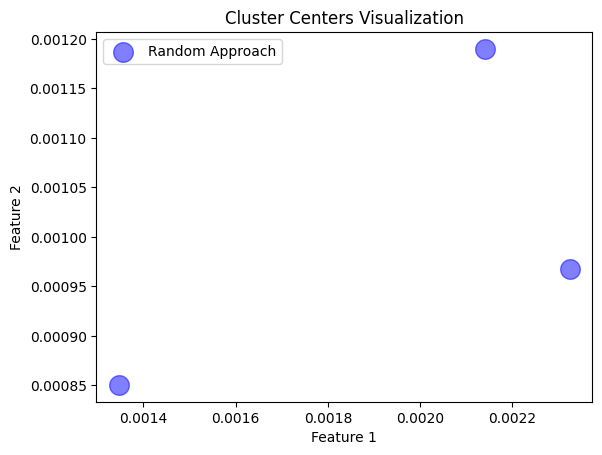

In [100]:
import matplotlib.pyplot as plt

plt.scatter(cluster_centers_r[:, 0], cluster_centers_r[:, 1], c='blue', s=200, alpha=0.5, label='Random Approach')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Centers Visualization')
plt.legend()

# Show the plot
plt.show()


In [101]:
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score

# Compute ARI scores
ari_random = adjusted_rand_score(cluster_labels_r, list(y))

# Compute FMI scores
fmi_random = fowlkes_mallows_score(cluster_labels_r, list(y))

# Print scores
print("KMeans Random - ARI score:", ari_random)
print("KMeans Random - FMI score:", fmi_random)


KMeans Random - ARI score: 6.969862484279118e-05
KMeans Random - FMI score: 0.4512884385598358


In [105]:
from scipy.sparse import csr_matrix
import pandas as pd

## construct the tfidf matrix
comments = list(data.text)  # Change 'Comment' to 'text'
matrix_sparse = tmu.build_tfidf_matrix(comments)

# Convert sparse matrix to DataFrame
tfidf_matrix = pd.DataFrame.sparse.from_spmatrix(matrix_sparse)

# Check the head of the DataFrame
print(tfidf_matrix.head())


MemoryError: Unable to allocate 13.3 GiB for an array with shape (39780, 44818) and data type float64